In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

In [4]:
data = pd.read_csv("/content/kc_house_data.csv.zip")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
z=np.abs(stats.zscore(data['price']))
print(z)

[0.86671733 0.00568792 0.98084935 ... 0.37586519 0.38158814 0.58588173]


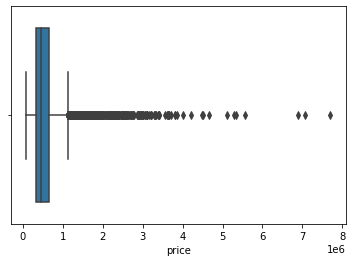

In [8]:
sns.boxplot(x=data['price'])

In [9]:

df = pd.DataFrame(data=data)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:

x = df
df.drop(['date'],axis=1)
for i in df:
    if i != 'date':
        q = df[i].quantile(0.99)
        df[df[i] < q]
        q_low = df[i].quantile(0.01)
        q_hi  = df[i].quantile(0.99)

        df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
        
df_filtered.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
print(len(df))
print(len(df_filtered))
if(len(df) == len(df_filtered)):
    print('No outliners')
data = df_filtered

21613
21178


In [12]:
#normalization
data_n = data.copy()
for i in data:
    if i!='date':
        data_n[i] = data[i].copy()
        data_n[i] = (data_n[i] - data_n[i].min())/(data_n[i].max() - data_n[i].min())
data_n.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,0.019266,0.090909,0.12500,0.075680,0.004338,0.0,0.0,0.0,0.5,0.500000,0.103851,0.000000,0.478261,0.000000,0.893939,0.571498,0.215000,0.153043,0.028583
1,0.647853,20141209T000000,0.060721,0.090909,0.28125,0.193878,0.005705,0.4,0.0,0.0,0.5,0.500000,0.219370,0.082988,0.443478,0.988089,0.626263,0.908959,0.163333,0.213913,0.041339
2,0.568795,20150225T000000,0.013770,0.060606,0.12500,0.040816,0.008074,0.0,0.0,0.0,0.5,0.416667,0.056009,0.000000,0.286957,0.000000,0.136364,0.936143,0.235000,0.393043,0.044052
3,0.251157,20141209T000000,0.069377,0.121212,0.37500,0.142007,0.003779,0.0,0.0,0.0,1.0,0.500000,0.088681,0.188797,0.565217,0.000000,0.681818,0.586939,0.101667,0.156522,0.024415
4,0.197333,20150218T000000,0.057049,0.090909,0.25000,0.118197,0.006425,0.0,0.0,0.0,0.5,0.583333,0.162194,0.000000,0.756522,0.000000,0.368687,0.741354,0.391667,0.233043,0.040467


In [15]:
#split data

train_data,test_data = train_test_split(data_n,test_size=0.1)

In [16]:

print(len(train_data))
train_data.head()

19060


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9809,0.548065,20141008T000000,0.121311,0.090909,0.28125,0.170918,0.013187,0.0,0.0,0.0,0.75,0.583333,0.100350,0.238589,0.547826,0.0,0.191919,0.766125,0.235833,0.302609,0.083954
3792,0.125720,20150506T000000,0.082230,0.090909,0.31250,0.161565,0.006810,0.0,0.0,0.0,0.50,0.583333,0.171529,0.089212,0.791304,0.0,0.161616,0.866013,0.255000,0.278261,0.055268
17082,0.153860,20140506T000000,0.078689,0.060606,0.12500,0.054422,0.030818,0.0,0.0,0.5,0.50,0.416667,0.074679,0.000000,0.443478,0.0,0.025253,0.665916,0.292500,0.406957,0.063798
21491,0.936241,20150327T000000,0.053639,0.090909,0.28125,0.113095,0.000709,0.8,0.0,0.0,0.50,0.583333,0.145858,0.016598,0.947826,0.0,0.131313,0.618626,0.407500,0.201739,0.000282
17012,0.566421,20140722T000000,0.110426,0.121212,0.31250,0.272959,0.008840,0.4,0.0,0.5,0.50,0.750000,0.374562,0.000000,0.826087,0.0,0.131313,0.639215,0.351667,0.584348,0.079061


In [17]:
xar = np.array(train_data['sqft_living'])
yar= np.array(train_data['price'])

In [18]:
#training data
from sympy import *
m, c = symbols('m c')
exp = '0.5*(y-m*x-c)**2'
exp_diff = Derivative(exp,m)
dfm = exp_diff.doit()
exp_diff = Derivative(exp,c)
dfc = exp_diff.doit()
print(f'1st order derivative w.r.t m and c :\nde/dm = {dfm} \nde/dc = {dfc}')
err=[]

#step 1:
m1=1.0
c1=-1.0
learning_rate=0.1
itr=25
bs=2
ns=len(xar)
nb=ns//bs
ms=ns%bs

for i in range(0,itr):
  for k in range(0,nb):
    er=0
    dedm1 = 0
    dedc1 = 0
    for j in range(0,bs):
      er+=((yar[j] - (m1 * xar[j]) - c1))**2
      id=k*bs+j
      #step 2:
      m,c,x,y = symbols('m c x y')
      dedm = dfm.subs(m,m1)
      dedm = dedm.subs(c, c1) 
      dedm= dedm.subs(x, xar[id]) 
      dedm = dedm.subs(y, yar[id])
      dedm = round(dedm,2)
      dedc = dfc.subs(c,c1)
      dedc = dedc.subs(m, m1) 
      dedc = dedc.subs(x, xar[id]) 
      dedc = dedc.subs(y, yar[id])
      dedc = round(dedc,2)
      dedm1 += dedm
      dedc1 += dedc

    dedm1 = dedm1/bs
    dedc1 = dedc1/bs
    dedm1 = round(dedm1,2)
    dedc1 = round(dedc1,2)
    #step 3:
    dm = (-0.1)*learning_rate*dedm1
    dc = (-0.1)*learning_rate*dedc1
    #step 4:
    m1 = m1+dm
    m1 = round(m1,2)
    c1 = c1+dc
    c1 = round(c1,2)
    er = (1/(2*len(train_data['sqft_living'])))*(er)
    err.append(er)

k=nb
if(ms>0):
  er=0
  dedm1=0
  dedc1=0
  for j in range(0,ms):
    er +=  ((yar[j] - (m1 * xar[j]) - c1))**2
    id=k*bs+j
    m,c,x,y = symbols('m c x y')
    dedm = dfm.subs(m,m1)
    dedm = dedm.subs(c, c1) 
    dedm= dedm.subs(x, xar[id]) 
    dedm = dedm.subs(y, yar[id])
    dedm = round(dedm,2)
    dedc = dfc.subs(c,c1)
    dedc = dedc.subs(m, m1) 
    dedc = dedc.subs(x, xar[id]) 
    dedc = dedc.subs(y, yar[id])
    dedc = round(dedc,2)
    dedm1 += dedm
    dedc1 += dedc

  dedm1 = dedm1/bs
  dedc1 = dedc1/bs
  dedm1 = round(dedm1,2)
  dedc1 = round(dedc1,2)
  #step 3:
  dm = (-0.1)*learning_rate*dedm1
  dc = (-0.1)*learning_rate*dedc1
  #step 4:
  m1 = m1+dm
  m1 = round(m1,2)
  c1 = c1+dc
  c1 = round(c1,2)
  er = (1/(2*len(train_data['sqft_living'])))*(er)
  err.append(er)


print(f'min value of m = {m1} \nmin value of c = {c1}')

1st order derivative w.r.t m and c :
de/dm = -1.0*x*(-c - m*x + y) 
de/dc = 1.0*c + 1.0*m*x - 1.0*y


KeyboardInterrupt: ignored

In [22]:
train_data_pred = [i for i in xar]
for k in range(len(xar)):
    train_data_pred[k]=(m1*xar[k] + c1)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yar,train_data_pred)
mse

0.1631291572023871

In [21]:
xar = np.array(test_data['sqft_living'])
yar = np.array(test_data['price'])

test_data_pred = [i for i in xar]
for k in range(len(xar)):
    test_data_pred[k]=(m1*xar[k] + c1)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yar,test_data_pred)
mse

0.1631291572023871

In [20]:
x_min = data['sqft_living'].min()
x_max = data['sqft_living'].max()
y_min = data['price'].min()
y_max = data['price'].max()

In [23]:
x1 = float(input("enter sqrt feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value :"))

x1 = (x1 - x_min)/(x_max - x_min)
y = m1*x1+c1
y = (y*(y_max - y_min) + y_min)*-1
print(f"price  is : {y}")

enter sqrt feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value :510
price  is : 3520392.55155187
